In [19]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib # joblib is used to save and load models



In [15]:
df = pd.read_csv('C:\myprojects\civil\data_concret_charge.csv')
df["time"] = df["time"].astype(str)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_14776\1051363691.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('C:\myprojects\civil\data_concret_charge.csv')


,grade,perc_GF,time,charge
0,M20,0.00,90,3450
1,M20,0.00,180,3165
2,M20,0.00,365,2912
3,M20,0.00,720,2810
4,M20,0.03,90,3100
5,M20,0.03,180,2512
6,M20,0.03,365,2478
7,M20,0.03,720,2462
8,M20,0.06,90,2972
9,M20,0.06,180,2413


In [11]:

# Assuming df is your DataFrame containing the data
df = pd.read_csv('C:\myprojects\civil\data_concret_charge.csv')
df["time"] = df["time"].astype(str)

# Step 1: Data Preparation
X = df[['grade', 'perc_GF', 'time']]  # Features
y = df['charge']  # Target variable

# Preprocessing for categorical features (grade and time)
categorical_features = ['grade', 'time']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical features (perc_GF)
numerical_transformer = StandardScaler()

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['perc_GF']),
        ('cat', categorical_transformer, categorical_features)
    ])


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_14776\1142680894.py:2: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('C:\myprojects\civil\data_concret_charge.csv')


In [12]:

# Step 3: Model Selection
svr = SVR()

# Pipeline with preprocessing and model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', svr)])

# Step 4: Cross-Validation Grid Search
param_grid = {
    'regressor__C': [0.1, 1, 10, 100],  # Regularization parameter
    'regressor__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'regressor__gamma': ['scale', 'auto']  # Kernel coefficient
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Best cross-validation score
print("Best Score:", grid_search.best_score_)


Best Parameters: {'regressor__C': 100, 'regressor__gamma': 'scale', 'regressor__kernel': 'linear'}
Best Score: -119225.42106053745


In [13]:

# Step 5: Model Evaluation
best_model = grid_search.best_estimator_

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 28769.52815735341
R-squared Score: 0.9409237546117121


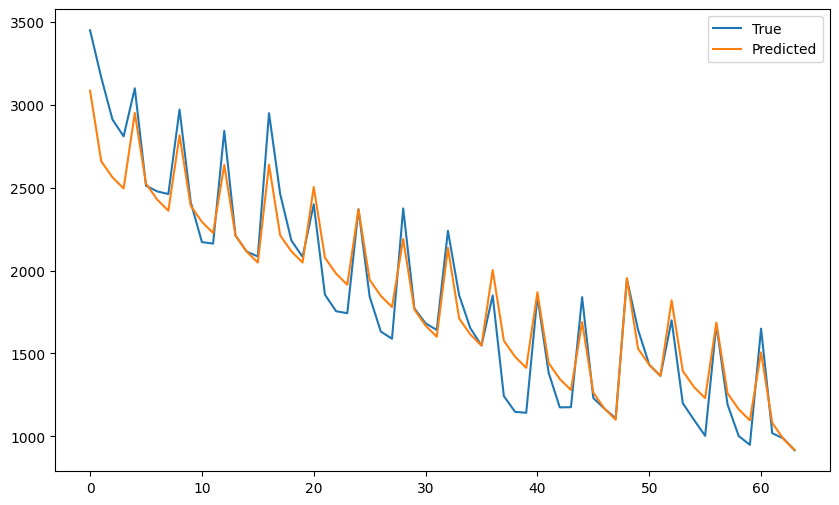

In [9]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Get the predictions using the best model
y_pred = best_model.predict(X)  # Making predictions on the input data

# Plot the true and predicted values
plt.figure(figsize=(10, 6))  # Creating a plot with a specified size
plt.plot(y, label='True')  # Plotting the true values
plt.plot(y_pred, label='Predicted')  # Plotting the predicted values
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot


In [17]:
# This function takes in grade, time, and perc_GF as inputs
# It creates a DataFrame with these inputs
# Then it uses the trained SVR model to predict the charge
# Finally, it returns the predicted charge
def predict_charge(grade, time, perc_GF):
    # Create DataFrame with input features
    data = pd.DataFrame({'grade': [grade], 'time': [time], 'perc_GF': [perc_GF]})
    
    # Predict charge using the trained SVR model
    charge_pred = best_model.predict(data)
    
    return charge_pred[0]

# Call the function with sample inputs
predict_charge('M30', '90', 0.0)

2638.579507953243

In [20]:
# Save the best model to a file
joblib.dump(best_model, 'svm_best_model_charge.pkl')


['svm_best_model_charge.pkl']